# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Ensemble Method on Classification Task

 **Anggota:**
1. **Aqilah Fedura Ilahi (1301213123)**
2. **Muhammad Danu F.R (1301213439)**
3. **Risna Zahira (1301213160)**

# Latar Belakang

Dataset Wine Quality menyajikan informasi mengenai varietas merah dan putih dari anggur "Vinho Verde" Portugal, dengan fokus pada fitur fisiko-kimia sebagai penilaian kualitas anggur. Dikumpulkan oleh Cortez et al. (2009), dataset ini menyoroti karakteristik anggur tanpa mencakup informasi seperti jenis anggur, merek, atau harga jual. Terdapat aspek unik terkait dataset ini, yakni keterbatasan variabel menjadi fitur fisiko-kimia, menawarkan potensi untuk menganalisis faktor-faktor yang berperan dalam menentukan kualitas anggur. Tugas klasifikasi atau regresi dapat diterapkan, dengan tantangan kelas tidak seimbang yang melibatkan lebih banyak sampel anggur normal. Dengan latar belakang ini, analisis kinerja model, terutama menggunakan Random Forest (RF), menghadirkan peluang untuk memahami relasi antara fitur fisiko-kimia dan penilaian kualitas anggur dalam konteks varietas "Vinho Verde".

# Pre Processing & EDA

1.
Eksplorasi Data: Memahami data dan mengidentifikasi nilai-nilai yang hilang atau bermasalah. Fase ini melibatkan beberapa Analisis Eksplorasi Data (EDA).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


Terdapat 13 features dalam dataset ini  yaitu :

* Fixed Acidity: Jumlah asam tetap dalam anggur.
* Volatile Acidity: Jumlah asam asetat dalam anggur.
* Citric Acid: Jumlah asam sitrat dalam anggur.
* Residual Sugar: Jumlah gula yang tersisa setelah fermentasi.
* Chlorides: Jumlah garam dalam anggur.
* Free Sulfur Dioxide: Bentuk bebas dari SO2 yang ada dalam anggur.
* Total Sulfur Dioxide: Total SO2 yang ada dalam anggur.
* Density: Kepadatan anggur.
* pH: Tingkat pH anggur.
* Sulphates: Jumlah sulfat dalam anggur.
* Alcohol: Kandungan alkohol.

Variabel Dependen (yang akan diprediksi):

* Quality: Skor kualitas anggur terkait.

In [ ]:
# URL of the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Download the data using requests
response = requests.get(url)

wine_data = pd.read_csv(StringIO(response.text), sep=";")

In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# mengecek apakah ada nilai null pada dataset
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Tidak ada nilai null atau kosong dalam dataset

In [ ]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


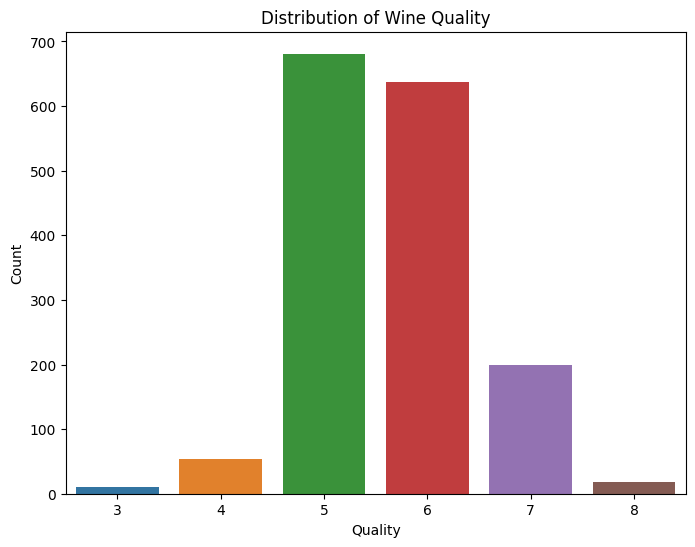

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


Grafik batang ini menunjukkan bagaimana penilaian kualitas anggur tersebar dalam dataset:

* Sebagian besar anggur mendapatkan penilaian kualitas 5 atau 6.
* Hanya sedikit anggur yang mendapatkan penilaian rendah (3) atau tinggi (8).


dalam grafik ini, kita punya gambaran bahwasanya dalam dataset tidak seimbnag dalam penilaian kualitas anggur

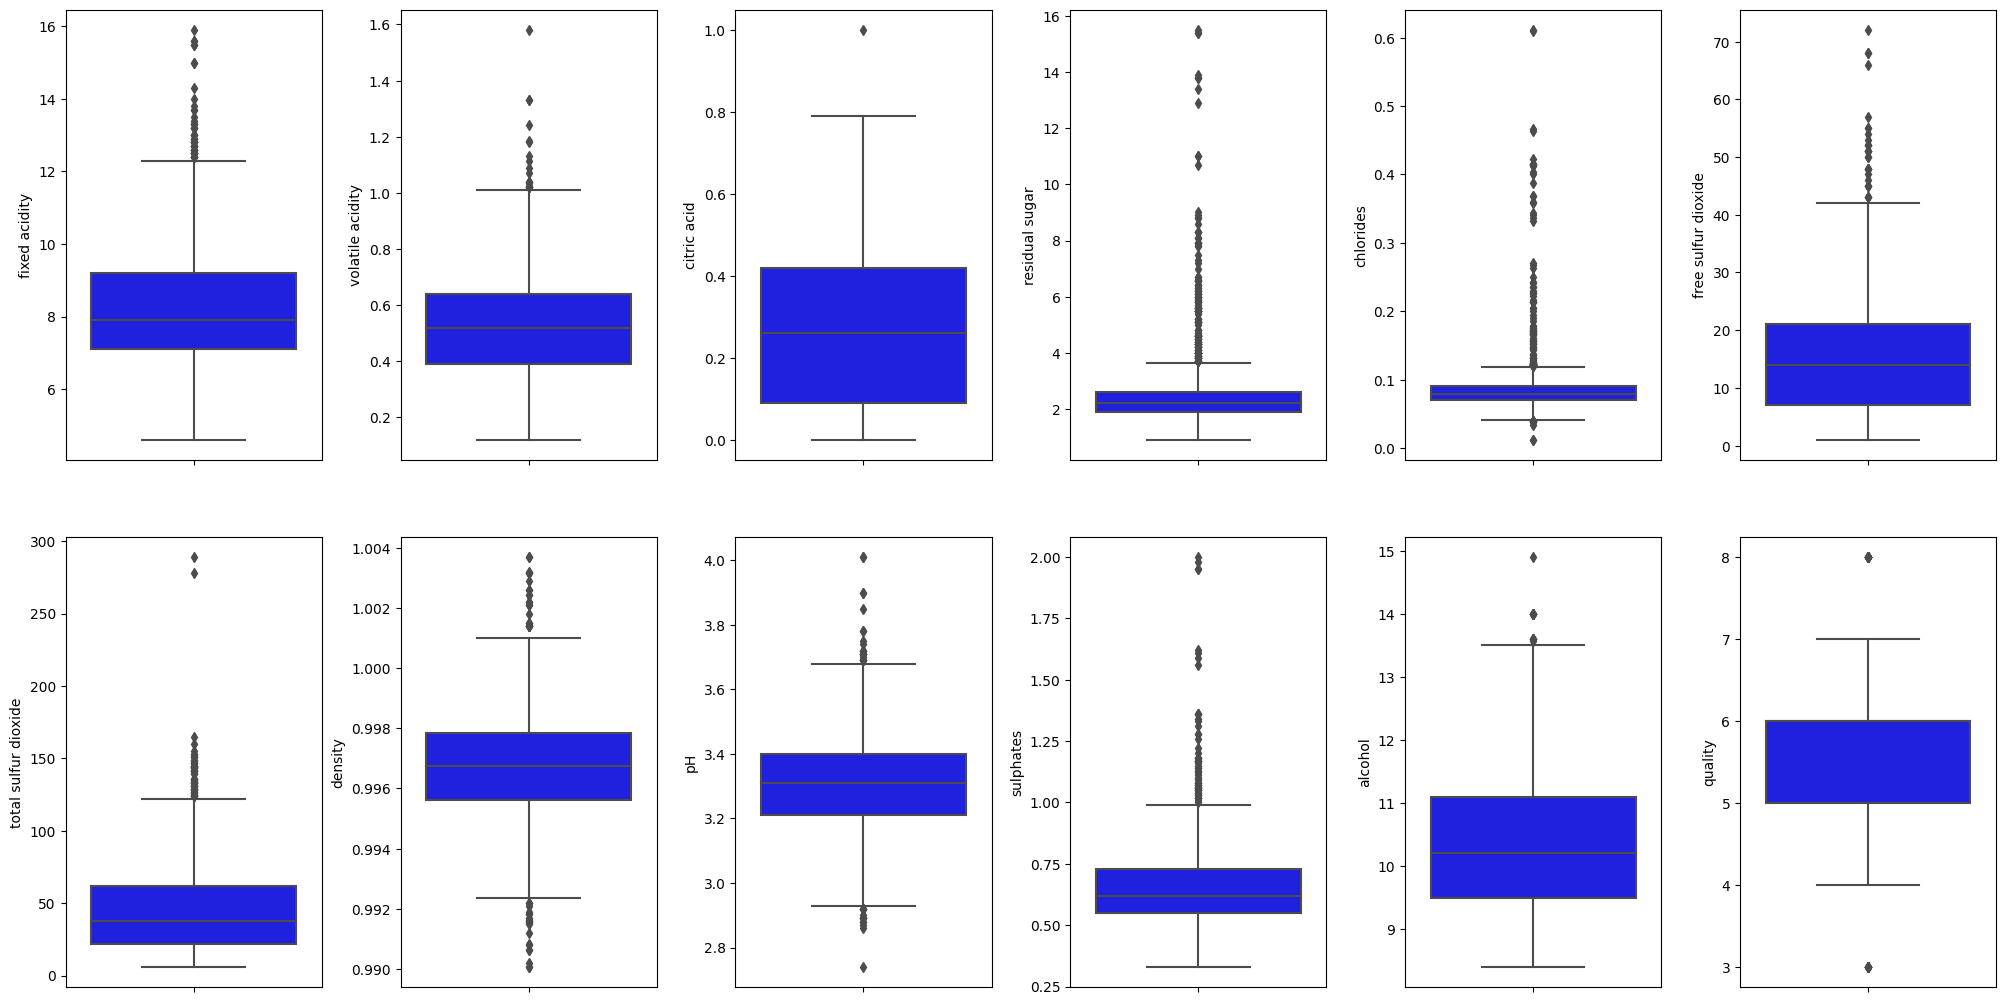

In [ ]:
#lets see whether our data has outliers or not:

# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine_data.items():
    sns.boxplot(y=col, data=wine_data, color='b', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
def mod_outlier(wine_data):
    wine_data_copy = wine_data.copy()
    wine_data_numeric = wine_data._get_numeric_data()
    q1 = wine_data_numeric.quantile(0.25)
    q3 = wine_data_numeric.quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    for col in wine_data_numeric.columns:
        for i in range(0, len(wine_data_numeric[col])):
            if wine_data_numeric[col][i] < lower_bound[col]:
                wine_data_numeric[col][i] = lower_bound[col]

            if wine_data_numeric[col][i] > upper_bound[col]:
                wine_data_numeric[col][i] = upper_bound[col]

    for col in wine_data_numeric.columns:
        wine_data_copy[col] = wine_data_numeric[col]

    return wine_data_copy

wine_data = mod_outlier(wine_data)


<ipython-input-34-0e62afe254d4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_numeric[col][i] = upper_bound[col]
<ipython-input-34-0e62afe254d4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_numeric[col][i] = lower_bound[col]


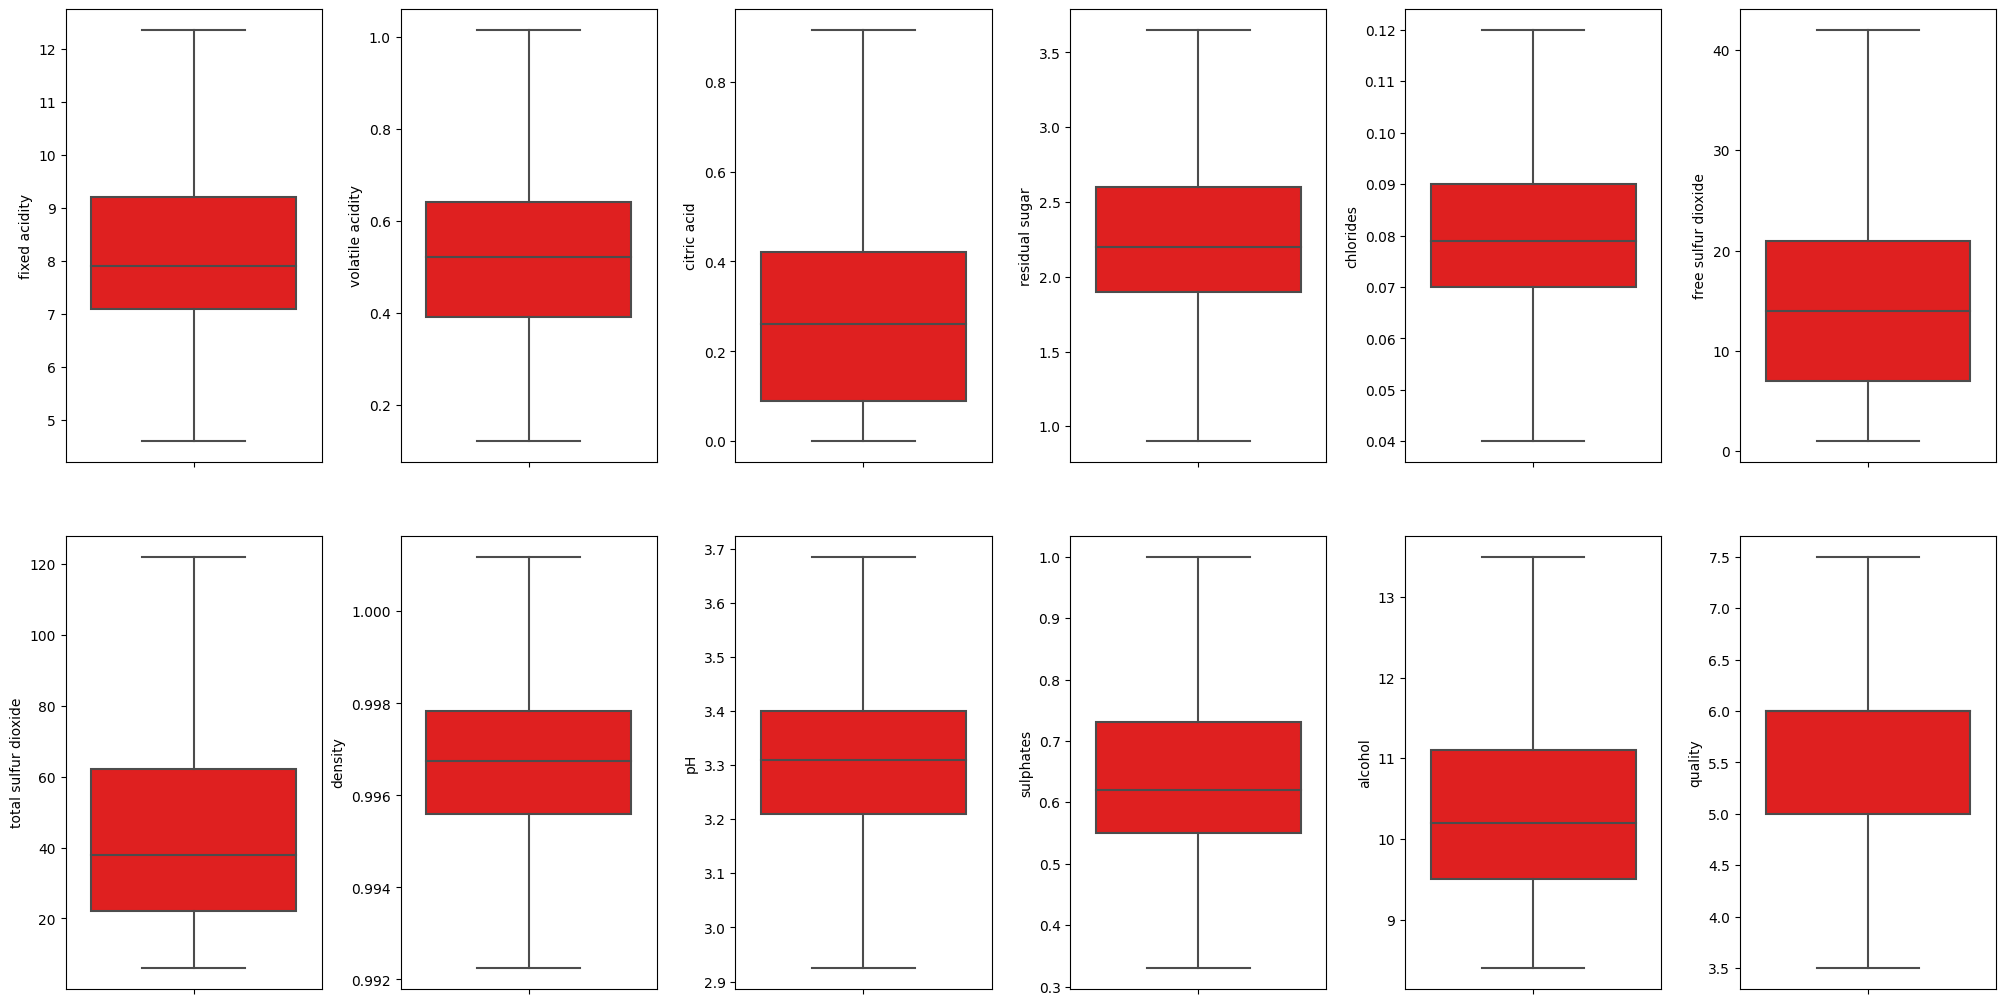

In [ ]:
# menampilkan plot setelah penghapusan outlier
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine_data.items():
    sns.boxplot(y=col, data=wine_data, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

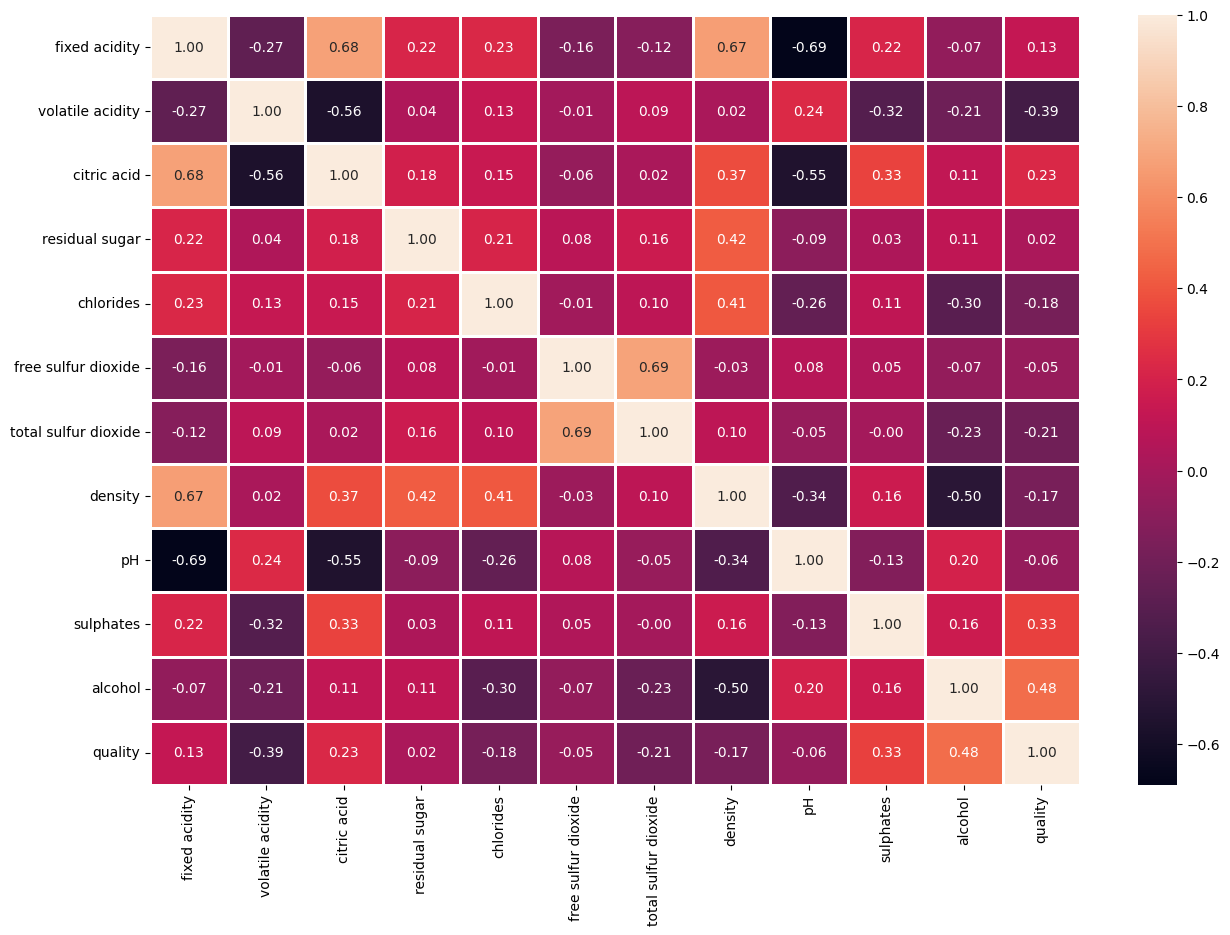

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(wine_data.corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

Heatmap ini menunjukkan seberapa erat hubungan antar berbagai fitur dalam dataset:

* Nilai yang mendekati 1 atau -1 menunjukkan hubungan yang kuat, baik positif atau negatif.
* Nilai yang mendekati 0 menunjukkan bahwa tidak ada hubungan linear yang signifikan.

Sebagai contoh, kandungan alkohol memiliki hubungan positif sebesar 0,44 dengan kualitas, yang berarti bahwa umumnya, semakin tinggi kandungan alkohol, semakin tinggi pula penilaian kualitasnya

contoh lainnya yaitu hubungan density dan residual sugar, dimana density atau kepadatan wine dipengaruhi oleh residual sugar. dimana berarti semakin tinggi residual sugar maka kepadatan atau densitynya semakin tinggi juga


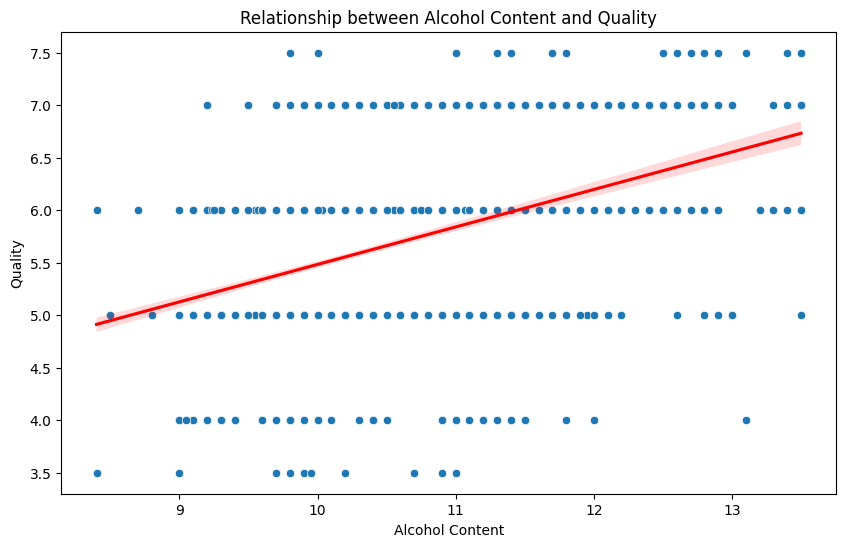

In [ ]:
# Plot the relationship between alcohol content and quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=wine_data)
sns.regplot(x='alcohol', y='quality', data=wine_data, scatter=False, color='red')
plt.title('Relationship between Alcohol Content and Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.show()


scatter plot ini menunjukkan bagaimana kandungan alkohol berhubungan dengan kualitas anggur. Garis merah melambangkan model regresi linear dasar yang disesuaikan dengan data.

Dapat dilihat ada kecenderungan umum yang naik, menurut garis regresi kita, yang mengindikasikan bahwa kandungan alkohol yang lebih tinggi seringkali terkait dengan kualitas anggur yang lebih tinggi. Jadi, jika kita mengikuti garis regresi, bisa dikatakan bahwa semakin tinggi kandungan alkohol, kemungkinan besar kualitas anggur juga lebih tinggi.

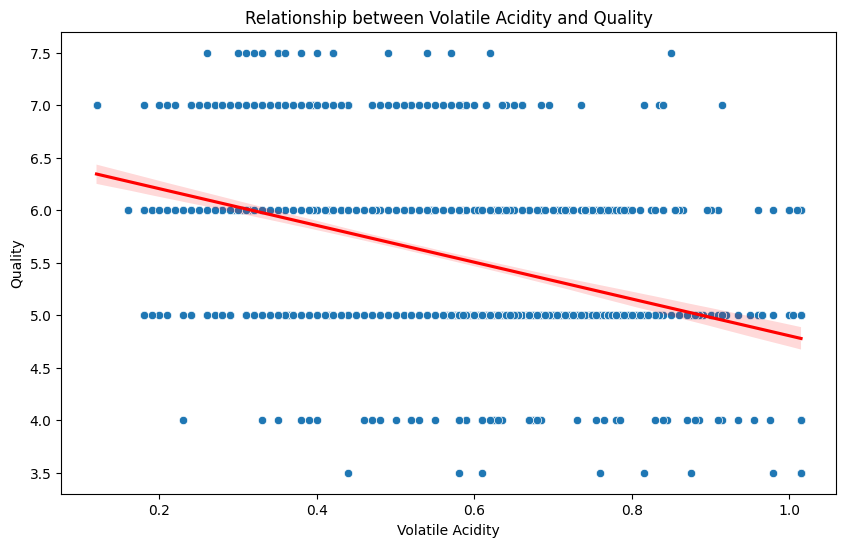

In [ ]:
# Plot the relationship between volatile acidity and quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='volatile acidity', y='quality', data=wine_data)
sns.regplot(x='volatile acidity', y='quality', data=wine_data, scatter=False, color='red')
plt.title('Relationship between Volatile Acidity and Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.show()


Dengan metode yang sama, scatter plot ini menunjukkan hubungan antara keasaman yang mudah menguap (volatile acidity) dan kualitas anggur. Garis merah sekali lagi melambangkan model regresi linear yang disesuaikan dengan data.

Ada kecenderungan umum yang menurun, yang menunjukkan bahwa tingkat keasaman yang mudah menguap yang lebih tinggi seringkali terkait dengan kualitas anggur yang lebih rendah.

Visualisasi ini memberikan wawasan tentang bagaimana kandungan alkohol dan keasaman yang mudah menguap secara potensial dapat mempengaruhi kualitas anggur.

In [ ]:
wine_data['category'] = wine_data['quality'] >= 7

X = wine_data[wine_data.columns[0:11]].values
y = wine_data['category'].values.astype(np.int)

<ipython-input-39-cbc7a7f81cef>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = wine_data['category'].values.astype(np.int)


# Ringkasan Metode

**Pembangunan Model Basline**

1. Pemisahan Data:

Pisahkan kumpulan data menjadi kumpulan pelatihan dan pengujian.

In [ ]:
# Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. Standardize the Features:

Standarisasi fitur untuk memastikan bahwa fitur tersebut memiliki skala yang serupa.

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


3. Train the Random Forest Model:


Buat dan latih model Random Forest menggunakan data pelatihan.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the scaled training data
rf_classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

4. Make Predictions:

Menggunakan model terlatih untuk membuat prediksi pada data pengujian.

In [ ]:
# Make predictions on the scaled test data
y_pred = rf_classifier.predict(X_test_scaled)

5. Evaluate mode:

Evaluasi performa model menggunakan metrik seperti matriks akurasi dan konfusi.

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.89
Confusion Matrix:
[[263  10]
 [ 24  23]]


**Eksplorasi Model**

**a.Turning Hyperparameter**

Grid Search merupakan salah satu metode hyperparameter tuning yang digunakan untuk mencari kombinasi terbaik dari beberapa nilai hyperparameter yang telah ditentukan sebelumnya.

disini hyperparameter diubah atau dieksplorasi pada model Random Forest dimana ada 4 hyperparameter yaitu :

1.   n_estimators : Ini adalah jumlah pohon dalam hutan. Semakin besar nilainya, semakin kompleks modelnya
2.   max_depth : Kedalaman maksimum setiap pohon dalam hutan. Nilai yang tinggi dapat meningkatkan kompleksitas model
3.   min_samples_split : Jumlah sampel minimum yang diperlukan untuk menjadi daun simpul. Nilai yang lebih tinggi dapat menghasilkan model yang lebih konservatif.
4. max_features : Jumlah fitur yang dipertimbangkan untuk pemisahan setiap simpul. Ini mempengaruhi kompleksitas model dan bisa digunakan untuk mengurangi overfitting.







In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Instantiate the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best models
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with Best Hyperparameters: {accuracy_best:.2f}")



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy with Best Hyperparameters: 0.90


**b. Cross Validation**

 jenis cross-validation yang digunakan adalah k-fold cross-validation dengan k=5

 cara kerja :
* Memisahkan data pelatihan menjadi k lipatan atau "fold" (dalam hal ini, 5 fold).
* Melibatkan k iterasi, di mana pada setiap iterasi, satu fold digunakan sebagai data uji dan k-1 fold lainnya digunakan sebagai data pelatihan.
* Proses ini diulangi k kali sehingga setiap fold digunakan sebagai data uji tepat sekali.
* Menghitung performa model pada setiap iterasi dan mengembalikan nilai-nilai tersebut.

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validated accuracy
cv_scores = cross_val_score(best_rf_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
average_accuracy = np.mean(cv_scores)

# Print the average accuracy
print(f"Cross-validated Accuracy: {average_accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Cross-validated Accuracy: 0.91


**c. Bagging Classifier**

Cara kerja :

* Model dasar yang dipilih adalah best_rf_classifier, yang merupakan model Random Forest yang telah di-tuning dengan menggunakan Grid Search Cross-Validation.
* BaggingClassifier diinisialisasi dengan menyertakan model dasar (base_estimator=best_rf_classifier), jumlah model yang akan dihasilkan (n_estimators=50), dan seed untuk kestabilan hasil (random_state=42).
* Bagging Classifier melakukan bootstrap sampling, yaitu mengambil sampel acak dengan penggantian dari data pelatihan.
* Setiap model dihasilkan dari bootstrap sampling tersebut dilatih pada subset data yang unik.
* Dalam hal ini, dilakukan 50 kali iterasi (n_estimators=50) untuk membentuk 50 model yang berbeda.
* Setelah semua model terbentuk, Bagging Classifier melakukan prediksi pada data uji (X_test_scaled) dengan setiap model yang dihasilkan.
* Hasil prediksi dari setiap model diagregasi untuk membentuk prediksi akhir. Pada kasus klasifikasi, ini bisa menjadi voting mayoritas dari semua model.
* Akurasi dari hasil prediksi diukur menggunakan fungsi accuracy_score dengan membandingkan prediksi (y_pred_bagging) dengan label sebenarnya (y_test).
* Akurasi dari Bagging Classifier dicetak untuk memberikan gambaran seberapa baik model ensemble ini dapat melakukan prediksi pada data uji.

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

# Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=best_rf_classifier, n_estimators=50, random_state=42)
bagging_classifier.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_classifier.predict(X_test_scaled)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Accuracy with Bagging: {accuracy_bagging:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` 

Accuracy with Bagging: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy with AdaBoost: 0.90


**d. Adaboost Classifier**

cara kerja
* Model dasar yang dipilih adalah best_rf_classifier, yaitu model Random Forest yang telah di-tuning.
* AdaBoostClassifier diinisialisasi dengan menyertakan model dasar (base_estimator=best_rf_classifier), jumlah model yang akan dihasilkan (n_estimators=50), dan seed untuk kestabilan hasil (random_state=42).
* AdaBoost memberikan bobot lebih kepada instances yang salah diklasifikasikan oleh model sebelumnya, sehingga fokus diberikan pada data yang sulit diklasifikasikan.
* Model Random Forest (best_rf_classifier) dilatih pada data pelatihan dan memberikan prediksi.
* Bobot diperbarui berdasarkan kesalahan prediksi.
* Proses ini diulangi sebanyak 50 kali (n_estimators=50), dengan setiap model berfokus pada data yang lebih sulit diklasifikasikan.
* Setelah semua model terbentuk, AdaBoost Classifier melakukan prediksi pada data uji (X_test_scaled) dengan setiap model yang dihasilkan.
* Hasil prediksi dari setiap model diagregasi dengan memberikan bobot lebih pada model yang lebih akurat.
* Akurasi dari hasil prediksi diukur menggunakan fungsi accuracy_score dengan membandingkan prediksi (y_pred_adaboost) dengan label sebenarnya (y_test).
* Akurasi dari AdaBoost Classifier dicetak untuk memberikan gambaran seberapa baik model ensemble ini dapat melakukan prediksi pada data uji.

In [ ]:
# AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=best_rf_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train_scaled, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test_scaled)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"Accuracy with AdaBoost: {accuracy_adaboost:.2f}")

In [ ]:
# List of accuracies
accuracies = [accuracy, accuracy_bagging, accuracy_adaboost, accuracy_best]

# List of model names
model_names = ['Random Forest', 'Bagging Classifier', 'AdaBoost Classifier', 'Random Forest (Best Hyperparameters)']

# Find the index of the highest accuracy
max_index = np.argmax(accuracies)

# Print the results
print("Comparison of Model Accuracies:")
for i, (model, acc) in enumerate(zip(model_names, accuracies)):
    print(f"{model}: {acc:.2f}")
    if i == max_index:
        print(f"   (Highest Accuracy)")

# Get the highest accuracy and corresponding model name
highest_accuracy = accuracies[max_index]
best_model_name = model_names[max_index]

print("\nBest Model:")
print(f"{best_model_name} has the highest accuracy: {highest_accuracy:.2f}")


Comparison of Model Accuracies:
Random Forest: 0.89
Bagging Classifier: 0.89
AdaBoost Classifier: 0.90
   (Highest Accuracy)
Random Forest (Best Hyperparameters): 0.90

Best Model:
AdaBoost Classifier has the highest accuracy: 0.90


# Hasil dan Analisis

In [ ]:
# Baseline Random Forest
print("Baseline Random Forest:")
print(f"Accuracy: {accuracy:.2f}")
print()

# Hyperparameter Tuning
print("Random Forest with Hyperparameter Tuning:")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy with Best Hyperparameters: {accuracy_best:.2f}")
print()

# Cross-Validation
print("Random Forest with Cross-Validation:")
print(f"Cross-validated Accuracy: {np.mean(cv_scores):.2f} +/- {np.std(cv_scores):.2f}")
print()

# Bagging
print("Random Forest with Bagging:")
print(f"Accuracy with Bagging: {accuracy_bagging:.2f}")
print()

# AdaBoost
print("Random Forest with AdaBoost:")
print(f"Accuracy with AdaBoost: {accuracy_adaboost:.2f}")
print()

# Model Comparison
accuracies = [accuracy, accuracy_best, np.mean(cv_scores), accuracy_bagging, accuracy_adaboost]
model_names = ["Baseline RF", "Tuned RF", "CV RF", "Bagging RF", "AdaBoost RF"]

best_model_index = np.argmax(accuracies)
best_model_name = model_names[best_model_index]

print(f"The best model is: {best_model_name} with accuracy {accuracies[best_model_index]:.2f}")



Baseline Random Forest:
Accuracy: 0.89

Random Forest with Hyperparameter Tuning:
Best Hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy with Best Hyperparameters: 0.90

Random Forest with Cross-Validation:
Cross-validated Accuracy: 0.91 +/- 0.02

Random Forest with Bagging:
Accuracy with Bagging: 0.89

Random Forest with AdaBoost:
Accuracy with AdaBoost: 0.90

The best model is: CV RF with accuracy 0.91


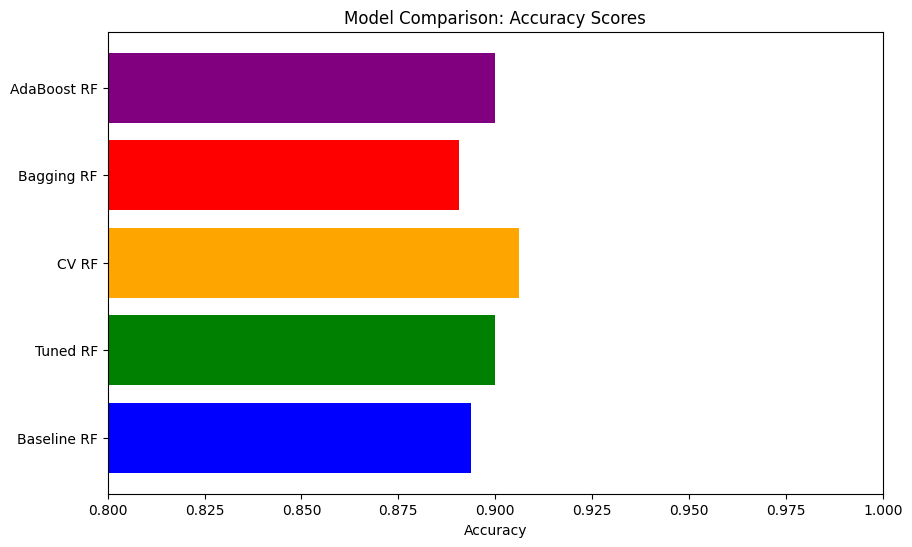

The best model is: CV RF with accuracy 0.91


In [ ]:
import matplotlib.pyplot as plt

# Data untuk visualisasi
accuracies = [accuracy, accuracy_best, np.mean(cv_scores), accuracy_bagging, accuracy_adaboost]
model_names = ["Baseline RF", "Tuned RF", "CV RF", "Bagging RF", "AdaBoost RF"]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Accuracy')
plt.title('Model Comparison: Accuracy Scores')
plt.xlim(0.8, 1.0)  # Sesuaikan rentang sumbu x jika diperlukan
plt.show()

print(f"The best model is: {best_model_name} with accuracy {accuracies[best_model_index]:.2f}")


Hasil dan Analisis
Berdasarkan hasil yang sidah diberikan, berikut adalah hasil dan analisisnya:

1. Random Forest Baseline: Model ini memiliki akurasi 0.89. Ini adalah titik awal sebelum melakukan tuning hyperparameter atau metode lainnya.

2. Random Forest dengan Hyperparameter Tuning: Dengan melakukan tuning pada hyperparameter seperti ‘max_depth’, ‘max_features’, ‘min_samples_leaf’, ‘min_samples_split’, dan ‘n_estimators’, akurasi model meningkat menjadi 0.90.

3. Random Forest dengan Cross Validation: Dengan menggunakan teknik Cross Validation, akurasi model meningkat menjadi 0.91 dengan deviasi standar +/- 0.02. Ini menunjukkan bahwa model ini memiliki kinerja terbaik dibandingkan model lainnya dalam hal ini.

4. Random Forest dengan Bagging: Teknik Bagging tidak meningkatkan akurasi model dari baseline, akurasinya tetap 0.89.

5. Random Forest dengan AdaBoost: Dengan menggunakan teknik boosting seperti AdaBoost, akurasi model meningkat sedikit menjadi 0.90, sama seperti model dengan Hyperparameter Tuning.

# Kesimpulan

Berdasarkan analisis kinerja model pada dataset Wine Quality, model Random Forest dengan penerapan cross-validation (CV RF) menghasilkan akurasi tertinggi sekitar 91%, menunjukkan kemampuan yang konsisten dalam berbagai situasi dataset. Meskipun model dengan hyperparameter tuning memberikan sedikit peningkatan akurasi menjadi 90%, CV RF tetap menjadi pilihan terbaik dengan keseimbangan yang baik antara akurasi tinggi dan kestabilan performa. Dalam perbandingan dengan teknik ensemble seperti Bagging dan AdaBoost, CV RF unggul dengan akurasi yang lebih tinggi. Oleh karena itu, untuk aplikasi praktis pada dataset ini, Random Forest dengan penerapan cross-validation adalah pilihan optimal.